In [2]:
import re
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Authors
Dawid Szarek

Mateusz Sroka

Kurzgesagt channel id: UCsXVk37bltHxD1rDPwtNM8Q
AsapSCIENCE channel id: UCC552Sd-3nyi_tk2BudLUzA

We get an information about Kurzgesagt and AsapSCIENCE films published on youtube. The information that we could download
by api were number of comments, reactions (likes and dislikes), views, titles, video id, video description and published 
date that were released by 20 November 2020.

We decided to download and work on data about these channels because we are interested about popular science topics. We found two popular channels which publish materials regularly.

## Kurzgesagt Channel

Kurzgesagt - In a Nutshell is a popular science channel. On the channel we can find animated educational content, using
the unique flat design style. It discussses scientific, technological, political and psychological topics. Videos on the 
channel are typically 4-16 minutes length. Kurzgesagt channel was created on 9 July 2013 and first video which explained 
evolution, was published on 11 July 2013. The channel has 13.5 million subscribers making it one of the greatest channels
on youtube. 

In [3]:
data_kurz = pd.read_csv('data_processed/kurzgesagt.csv')

In [4]:
data_kurz[data_kurz['views'] == data_kurz['views'].max()]['title']

14    The Coronavirus Explained & What You Should Do
Name: title, dtype: object

In [5]:
data_kurz.columns

Index(['comment', 'disliked', 'liked', 'publishedDate', 'title',
       'video_description', 'videoid', 'views', 'title_processed',
       'title_processed_only_text', 'video_description_processed',
       'video_description_processed_only_text'],
      dtype='object')

In [6]:
data_kurz.head()

comment  disliked   liked         publishedDate  \
0     9346      2178  208629  2020-11-08T16:12:08Z   
1    18661      5391  249729  2020-10-27T08:02:50Z   
2     4995      1277   87967  2020-10-08T10:04:14Z   
3    18348      3241  319268  2020-10-06T08:13:35Z   
4    40403      7575  319401  2020-09-29T07:31:08Z   

                                               title  \
0        How Large Can a Bacteria get? Life & Size 3   
1  Geoengineering: A Horrible Idea We Might Have ...   
2                      The 12,021 Human Era Calendar   
3           When Time Became History - The Human Era   
4  Is It Too Late To Stop Climate Change? Well, i...   

                                   video_description      videoid    views  \
0  The first 1000 people to use this link will ge...  E1KkQrFEl2I  3398019   
1  To support Kurzgesagt and learn more about Bri...  dSu5sXmsur4  3834605   
2  ** UPDATE: For a short time calendars are back...  xxFqPNPJuU8  1333455   
3  ** UPDATE: For a short time calendars are back...  CWu29PRCUvQ  4712388   
4  A special thanks to the team at Our World for ...  wbR-5mHI6bo  4285456   

                                     title_processed  \
0  How Large Can a Bacteria get? Life & Size <num...   
1  Geoengineering: A Horrible Idea We Might Have ...   
2                    The <number> Human Era Calendar   
3           When Time Became History - The Human Era   
4  Is It Too Late To Stop Climate Change? Well, i...   

                           title_processed_only_text  \
0      How Large Can a Bacteria get Life Size number   
1  Geoengineering A Horrible Idea We Might Have t...   
2                      The number Human Era Calendar   
3             When Time Became History The Human Era   
4  Is It Too Late To Stop Climate Change Well it ...   

                         video_description_processed  \
0  The first <number> people to use this link wil...   
1  To support Kurzgesagt and learn more about Bri...   
2  ** UPDATE: For a short time calendars are back...   
3  ** UPDATE: For a short time calendars are back...   
4  A special thanks to the team at Our World for ...   

               video_description_processed_only_text  
0  The first number people to use this link will ...  
1  To support Kurzgesagt and learn more about Bri...  
2  UPDATE For a short time calendars are back in ...  
3  UPDATE For a short time calendars are back in ...  
4  A special thanks to the team at Our World for ...

In [7]:
data_kurz['publishedDate'] = pd.to_datetime(data_kurz['publishedDate'], format='%Y/%m/%d')

In [8]:
data_kurz = data_kurz.sort_values(by='publishedDate')

In [9]:
data_kurz['percentage'] = data_kurz['liked']/(data_kurz['liked'] + data_kurz['disliked'])

We download data about 131 Kurzgesagt films. We print basic statistics.

In [10]:
data_kurz.describe()

comment      disliked         liked         views  percentage
count     131.000000    131.000000  1.310000e+02  1.310000e+02  131.000000
mean    23596.503817   5857.389313  2.933131e+05  8.957372e+06    0.980442
std     20324.954645   6786.020867  1.803590e+05  4.829093e+06    0.015594
min       471.000000     76.000000  1.042800e+04  4.287220e+05    0.891698
25%     12691.000000   2292.000000  1.797660e+05  5.761288e+06    0.977347
50%     18666.000000   4070.000000  2.808610e+05  8.061701e+06    0.985510
75%     28949.000000   6894.000000  3.676205e+05  1.111144e+07    0.989117
max    153872.000000  56385.000000  1.286870e+06  2.783992e+07    0.995063

In [11]:
sns.set()

The first thing we want to see is the percent of positive reactions under Kurzgesagt films in time. As we can see there 
much more positive reactions. It is because films are made that they reach every social group. Mostly films not discuss 
controversial topics. They are made in a simple and reliable. Both adults and children can explore the topic discussed 
in the video without any problem with understanding. 

We can see there is  only one film that has more than 10% negative reactions. We can assume that the video topic was 
controversial or it was made in a different style.

Text(0,0.5,'Percent of positive reactions')

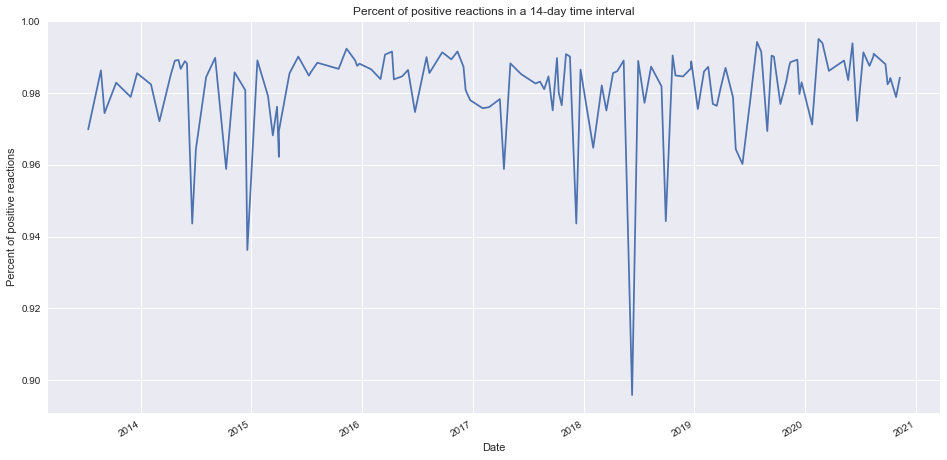

In [12]:
plt.figure(figsize=(16, 8))
data_kurz.groupby('publishedDate').sum()['percentage'].rolling('14d').mean().plot()
plt.title("Percent of positive reactions in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Percent of positive reactions')

As we can see the video with the lowest positive reactions ratio is "The Ultimate Conspiracy Debunker". It is really 
short film that shows how to in simple way detect false conspiracy theories. That kind of theories in the internet are 
really important so the video gets a lot of negative reactions

The second least video on Kurzgesagt channel is "3 Arguments Why Marijuana Should Stay Illegal Reviewed". The biggest 
group of youtube users are young people. They have usually liberal views. Whether video is reliable and well-made it gets
a lot of negative reactions. That


In [13]:
data_kurz[['title', 'percentage']][data_kurz['percentage'] < 0.9]

title  percentage
109                   The Ultimate Conspiracy Debunker    0.891698
51   3 Arguments Why Marijuana Should Stay Illegal ...    0.895822

On chart below we can see that average of views in 14-day interval. As we can see the amount of views is independent of 
time. It is because we don't have information about every single view. When the channel gain popularity a lot of people 
watch not only new videos but also the previous. That's why by using this dataset we cannot measure tha channel performance
in time. However we can see that average values of views in time are on similar level (with some exceptions). It means that
the quality of films is on the same level.

Text(0,0.5,'Amount of views')

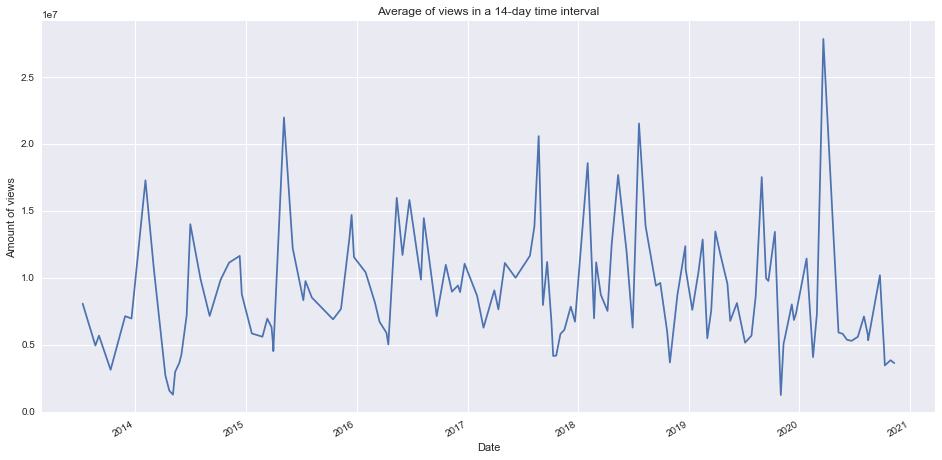

In [14]:
plt.figure(figsize=(16, 8))
data_kurz.groupby('publishedDate').sum()['views'].rolling('14d').mean().plot()
plt.title("Average of views in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Amount of views')

## AsapSCIENCE Channel
AsapSCIENCE is a channel that produces weekly videos about many different topics of science. The videos formula is similar 
to Kuzgesagt. There are two person who tell about some topics (sometimes in form of little discussion) and showing
it in a funny and interesting way by using some cartoon drawing. There are some science related songs. The channel is more 
entertaining than Kurzgesagt. The channel has a 9.5 millions of subscribers. The first video was published on the channel on 6 June 2012.

In [15]:
data_asap = pd.read_csv('data_processed/AsapSCIENCE.csv')

In [16]:
data_asap['publishedDate'] = pd.to_datetime(data_asap['publishedDate'], format='%Y/%m/%d')

In [17]:
data_asap = data_asap.sort_values(by='publishedDate')

In [18]:
data_asap['percentage'] = data_asap['liked']/(data_asap['liked'] + data_asap['disliked'])

We download data about 349 AsapSCIENCE films. We print basic statistics.

In [19]:
data_asap.describe()

comment      disliked          liked         views  percentage
count     349.000000    349.000000     349.000000  3.490000e+02  349.000000
mean     7888.618911   2682.157593   65582.939828  4.131223e+06    0.956635
std     16444.209952   4588.305658   87949.810462  5.347647e+06    0.052519
min        70.000000     42.000000    2895.000000  1.039560e+05    0.548011
25%      2136.000000    687.000000   24519.000000  1.111091e+06    0.955061
50%      4032.000000   1384.000000   44302.000000  2.457655e+06    0.972166
75%      7583.000000   2675.000000   72918.000000  5.304603e+06    0.980605
max    224275.000000  54377.000000  973205.000000  6.131116e+07    0.992156

On chart below we can se the average percent of positive reactions in a 14-day time interval for AsapSCIENCE channel. We 
can see that the positive reactions ratio level was high and really consistent until the end of 2016. After that somethings
happen and the variance was higher. It could be caused by that the formula of channel changed. On the internet we can find 
some opinions that videos started to be less reliable, the topics were choose by popularity. It annoyed fans who were
accustomed to the good quality films with interesting topics.

Text(0,0.5,'Percent of positive reactions')

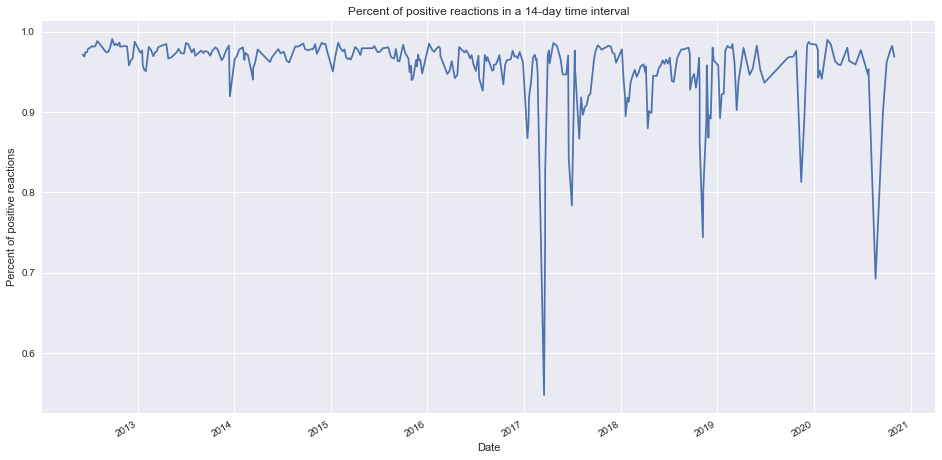

In [20]:
plt.figure(figsize=(16, 8))
data_asap.groupby('publishedDate').sum()['percentage'].rolling('14d').mean().plot()
plt.title("Percent of positive reactions in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Percent of positive reactions')

As we can see the average positive reactions ratio dropped by 3 percentage points.

In [21]:
print(f"Mean percentage of positive reactions before 2017: {data_asap[data_asap['publishedDate'] < '2017-01-01']['percentage'].mean()}, \n"
      f"Mean percentage of positive reactions after 2016: {data_asap[data_asap['publishedDate'] >= '2017-01-01']['percentage'].mean()}")

Mean percentage of positive reactions before 2017: 0.9699454982049018, 
Mean percentage of positive reactions after 2016: 0.9391814639789554


We can see that in this period number of views dropped even more rapidly than positive reactions ratio. It is weird because 
channel lost popularity in a short period of time. Average number of views dropped almost twice. We think that quick change 
cannot be caused only by the shifting of videos formula. Probably there were some changes in the topics selection. Maybe
they are less interesting or they don;t fit properly to the youtube positioning algorithm. At the begining of the channel
videos were "family friendly" and these type of materials are favored by youtube. Goggle shares the data that shows number 
of subscribers constitute approx 5-10% all of views. The rest of it are people which youtube somehow recommend that video.
It is interesting how platform can manipulate popularity to a certain extent of every single video.

Text(0,0.5,'Amount of views')

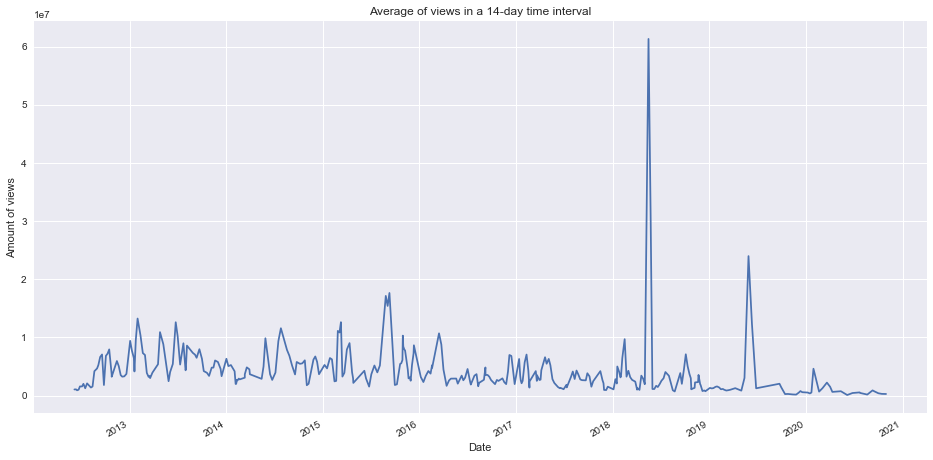

In [22]:
plt.figure(figsize=(16, 8))
data_asap.groupby('publishedDate').sum()['views'].rolling('14d').mean().plot()
plt.title("Average of views in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Amount of views')


In [23]:
print(f"Average amount of views of the single video before 2017: {int(data_asap[data_asap['publishedDate'] < '2017-01-01']['views'].mean())}, \n"
      f"Average amount of views of the single video after 2016: {int(data_asap[data_asap['publishedDate'] >= '2017-01-01']['views'].mean())}")

Average amount of views of the single video before 2017: 5079187, 
Average amount of views of the single video after 2016: 2888196


## Comparative analysis

In this section we will compare discussed channels. We will try to find some similarities and differences.

On chart below we can see the average number of views in time. We can see that Kurzgesagt channel is much more consistent
in this case. The popularity of films is on the same level for years. Of course AsapSCIENCE have their moments but in general
Kurzgesagt has better performance.

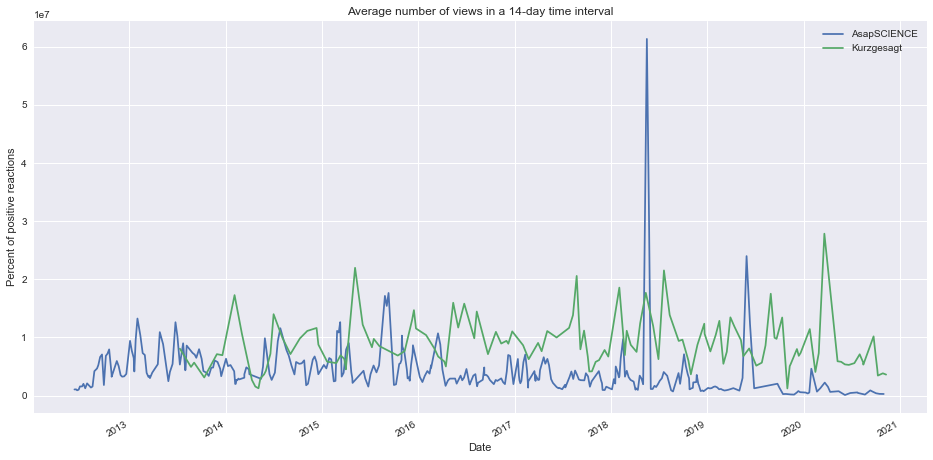

In [24]:
plt.figure(figsize=(16, 8))
data_asap.groupby('publishedDate').sum()['views'].rolling('14d').mean().plot(label="AsapSCIENCE")
data_kurz.groupby('publishedDate').sum()['views'].rolling('14d').mean().plot(label="Kurzgesagt")
plt.title("Average number of views in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Percent of positive reactions')
plt.legend()

As we can see average number of views of Kurzgesagt video is over twice higher than AsapSCIENCE.

In [25]:
print(f"Average amount of views for each AsapSCIENCE videos: {int(data_asap['views'].mean())}, \n"
      f"Average amount of views for each Kurzgesagt videos: {int(data_kurz['views'].mean())}")


Average amount of views for each AsapSCIENCE videos: 4131222, 
Average amount of views for each Kurzgesagt videos: 8957371


We can see on chart below that Kurzgesagt has better positive reactions ratio. This is especially visible from the begining 
of 2017 when AsapSCIENCE started to have more disliked videos. Kurzgesagt has polished content that work and grant very good 
popularity. Even if Kurzgesagt studio raise a controversial topic can tell about it in way that most of people are not feel 
offended. 

Text(0,0.5,'Percent of positive reactions')

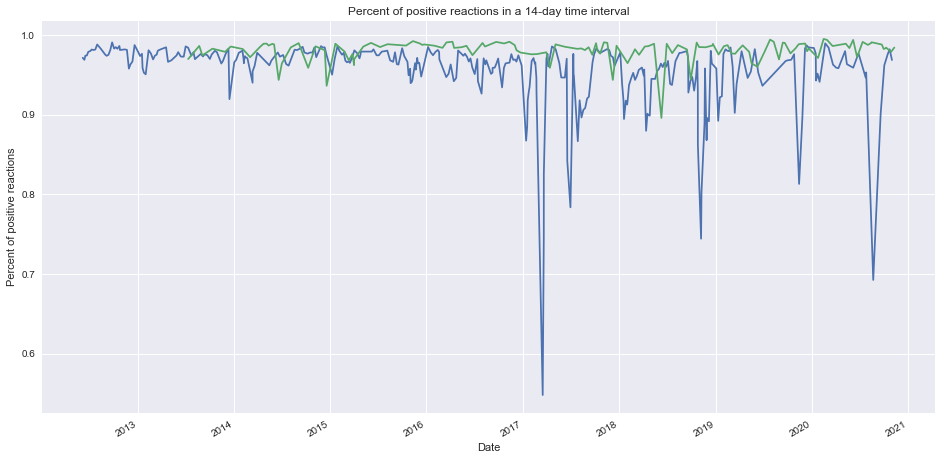

In [26]:
plt.figure(figsize=(16, 8))
data_asap.groupby('publishedDate').sum()['percentage'].rolling('14d').mean().plot(label="AsapSCIENCE")
data_kurz.groupby('publishedDate').sum()['percentage'].rolling('14d').mean().plot(label="Kurzgesagt")
plt.title("Percent of positive reactions in a 14-day time interval")
plt.xlabel("Date")
plt.ylabel('Percent of positive reactions')

On the figures below we decided to show how look distributions of likes and positive reactions ratio distribution. There we can see that Kurzgesagt has a lot better performance in this field. Kurzgesagt have more reactions under their films than AsapSCIENCE even though they have over twice more views. It could mean Kurzgesagt audience is more involved or their videos provoke discussions. It is important because if people are involved they will more willingly return to watch other films.

In [27]:
data_kurz[data_kurz['views'] == data_kurz['views'].max()][['title', 'views', 'liked']]

title     views   liked
14  The Coronavirus Explained & What You Should Do  27839922  930022

In [28]:
data_asap[data_asap['views'] == data_asap['views'].max()][['title', 'views', 'liked']]

title     views   liked
81  Do You Hear "Yanny" or "Laurel"? (SOLVED with ...  61311155  695581

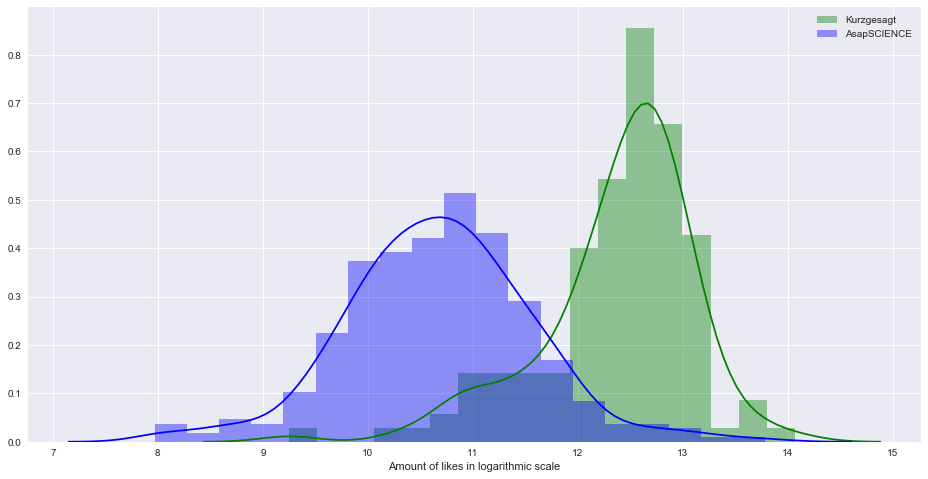

In [29]:
plt.figure(figsize=(16, 8))
sns.distplot(np.log(data_kurz['liked']), label=r'Kurzgesagt', color='green')
sns.distplot(np.log(data_asap['liked']), label=r'AsapSCIENCE', color='blue')
plt.xlabel("Amount of likes in logarithmic scale")
plt.legend()

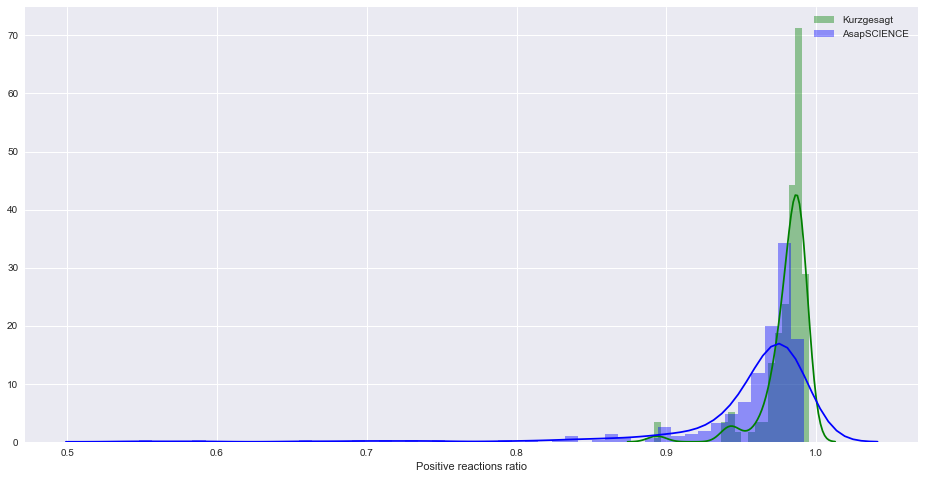

In [30]:
plt.figure(figsize=(16, 8))
sns.distplot(data_kurz['percentage'], label=r'Kurzgesagt', color='green')
sns.distplot(data_asap['percentage'], label=r'AsapSCIENCE', color='blue')
plt.xlabel("Positive reactions ratio")
plt.legend()

In [31]:
films_by_year_kurz = data_kurz['publishedDate'].groupby(data_kurz['publishedDate'].dt.to_period('Y')).count()
films_by_year_asap = data_asap['publishedDate'].groupby(data_asap['publishedDate'].dt.to_period('Y')).count()

In [32]:
films_by_year_kurz

publishedDate
2013     6
2014    16
2015    16
2016    16
2017    18
2018    18
2019    23
2020    18
Freq: A-DEC, Name: publishedDate, dtype: int64

In [33]:
films_by_year_asap

publishedDate
2012    30
2013    41
2014    39
2015    45
2016    43
2017    48
2018    53
2019    27
2020    23
Freq: A-DEC, Name: publishedDate, dtype: int64

In [34]:
df1 = pd.DataFrame({"Channel": "Kurzgesagt", "Year": films_by_year_kurz.index, "Views": films_by_year_kurz.values})
df2 = pd.DataFrame({"Channel": "AsapSCIENCE", "Year": films_by_year_asap.index, "Views": films_by_year_asap.values})
df = pd.concat([df2, df1])

We can see Kurzgesagt channel publish less materials each year. We can see the increasing trend over the years. Probably it is because studio develops and they have more money and other resources to create more material which are at a sufficiently high quality level.

On the other side pis AsapSCIENCE which decided to create a lot of materials (around 40-50 yearly). It may affect negative for the quality of videos.

We can see two different approaches. In the next steps we want to see which of them was better.

Text(0.5,1,'Number of published films in each year')

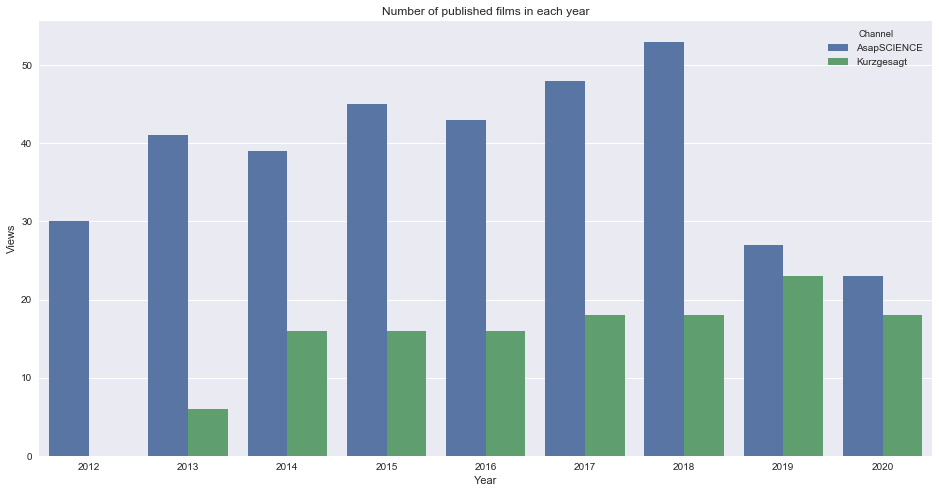

In [35]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Year", y="Views", hue="Channel", data=df)
plt.title('Number of published films in each year')

In [36]:
sum_views_by_year_kurz = data_kurz['views'].groupby(data_kurz['publishedDate'].dt.to_period('Y')).sum()
sum_views_by_year_asap = data_asap['views'].groupby(data_asap['publishedDate'].dt.to_period('Y')).sum()

In [37]:
sum_views_by_year_kurz.sort_values()

publishedDate
2013     36603772
2020    125449933
2014    128945115
2015    144715442
2017    161530225
2016    163585414
2018    202058490
2019    210527302
Freq: A-DEC, Name: views, dtype: int64

In [38]:
sum_views_by_year_asap

publishedDate
2012    106857893
2013    270202688
2014    185066947
2015    292968802
2016    150582717
2017    147836540
2018    209032611
2019     52806870
2020     26441600
Freq: A-DEC, Name: views, dtype: int64

In [39]:
df1 = pd.DataFrame({"Channel": "Kurzgesagt", "Year": sum_views_by_year_kurz.index, "Views": sum_views_by_year_kurz.values})
df2 = pd.DataFrame({"Channel": "AsapSCIENCE", "Year": sum_views_by_year_asap.index, "Views": sum_views_by_year_asap.values})
df = pd.concat([df2, df1])

On the chart below we can see the number of views by the year videos were published. We see some dependence between time and views. It is because most of the views come shortly after the publication. So the videos that were published after the channel gains popularity have much more views. 

As we mentioned before AsapSCIENCE published much more materials than Kurzgesagt. We can also see that Kurzgesagt amount of views increases each year. It gives them an opportunity to develop their channel and maintain growth by making even better videos in the future. We can see that in 2020 they noticed some decline but we will discuss it in the next step.

AsapSCIENCE isin't that cvonsistent a Kurzgesagt. The amount of views sometimes growthing sometimes declining. We can see that in last two years amount of their views dropped rapidly. They published less films and get much less views.

Text(0.5,1,'Number of views in each year')

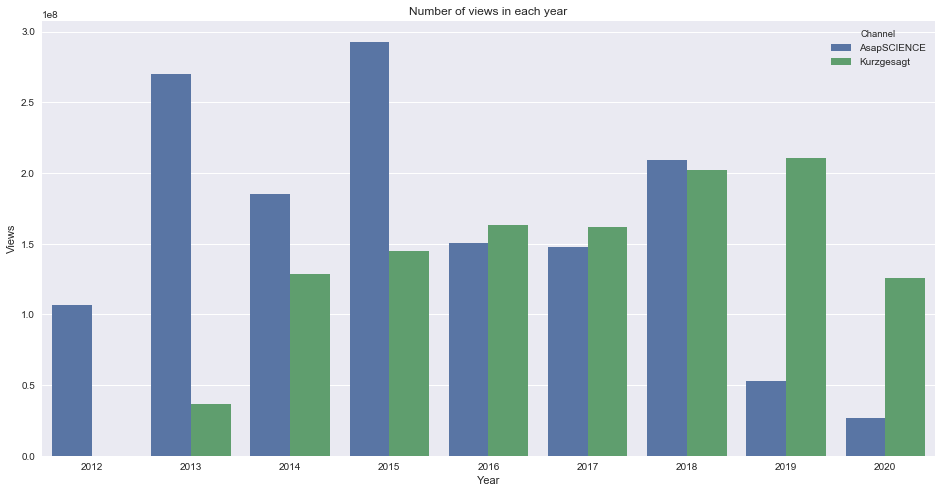

In [40]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Year", y="Views", hue="Channel", data=df)
plt.title("Number of views in each year")

In [41]:
mean_views_by_year_kurz = data_kurz['views'].groupby(data_kurz['publishedDate'].dt.to_period('Y')).mean()
mean_views_by_year_asap = data_asap['views'].groupby(data_asap['publishedDate'].dt.to_period('Y')).mean()

In [42]:
mean_views_by_year_kurz

publishedDate
2013    6.100629e+06
2014    8.059070e+06
2015    9.044715e+06
2016    1.022409e+07
2017    8.973901e+06
2018    1.122547e+07
2019    9.153361e+06
2020    6.969441e+06
Freq: A-DEC, Name: views, dtype: float64

In [43]:
mean_views_by_year_asap

publishedDate
2012    3.561930e+06
2013    6.590309e+06
2014    4.745306e+06
2015    6.510418e+06
2016    3.501924e+06
2017    3.079928e+06
2018    3.944012e+06
2019    1.955810e+06
2020    1.149635e+06
Freq: A-DEC, Name: views, dtype: float64

In [44]:
df1 = pd.DataFrame({"Channel": "Kurzgesagt", "Year": mean_views_by_year_kurz.index, "Views": mean_views_by_year_kurz.values})
df2 = pd.DataFrame({"Channel": "AsapSCIENCE", "Year": mean_views_by_year_asap.index, "Views": mean_views_by_year_asap.values})
df = pd.concat([df2, df1])

We can see that Kurzgesagt videos almost from the begining of channel had a better performance than AsapSCIENCE videos. This chart shows that the popularity of Kurzgesagt from the 2016 is much higher. It could mean that AsapSCIENCE keep up in the competition. A lot of underdeveloped videos cannot grant much views. In the long period of time.

Text(0.5,1,'Average of views by the year of published')

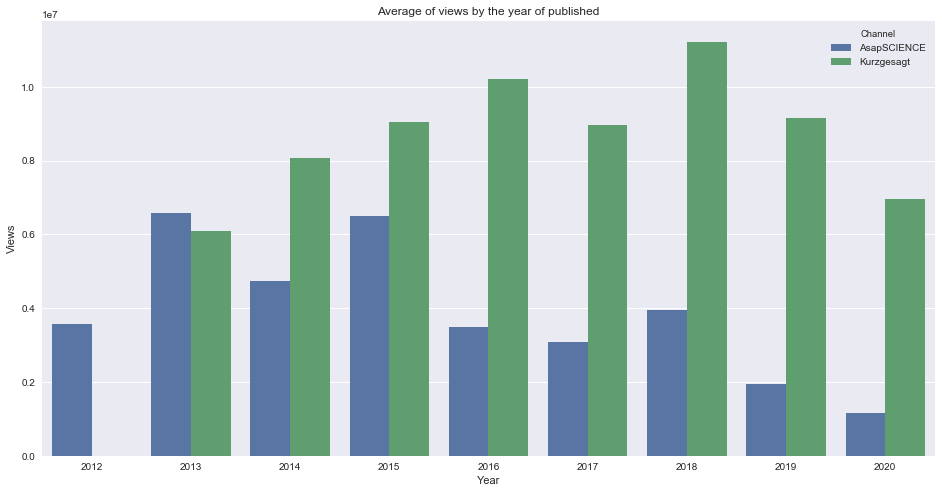

In [45]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Year", y="Views", hue="Channel", data=df)
plt.title('Average of views by the year of published')

In [46]:
views_by_month_kurz = data_kurz['views'].groupby(data_kurz['publishedDate'].dt.month).mean()
views_by_month_asap = data_asap['views'].groupby(data_asap['publishedDate'].dt.month).mean()

In [47]:
views_by_month_kurz

publishedDate
1     8.817379e+06
2     1.036146e+07
3     1.095280e+07
4     6.393238e+06
5     9.412722e+06
6     8.720189e+06
7     1.044462e+07
8     1.169458e+07
9     8.730587e+06
10    5.552513e+06
11    7.624758e+06
12    9.189056e+06
Name: views, dtype: float64

In [48]:
df1 = pd.DataFrame({"Channel": "Kurzgesagt", "Year": views_by_month_kurz.index, "Views": views_by_month_kurz.values})
df2 = pd.DataFrame({"Channel": "AsapSCIENCE", "Year": views_by_month_asap.index, "Views": views_by_month_asap.values})
df = pd.concat([df2, df1])

On char below we can see that there is dependence between month of published and amount of views. As we can see for each channel amount of views is of course different. It is interesting that we can see strong dependence between publish month and average number of video views. In months when students go back to schools (september and october) we can see strong decreasing of views. So it can be the best time for holidays for youtubers. There is the secound decline in April but we cannot find any meaningful 
explanation and we can see it only for Kurzgesagt channel so it can be just coincidence. In the future we would like to check it for other cannals.

Text(0.5,1,'Average number of views for each video in each month')

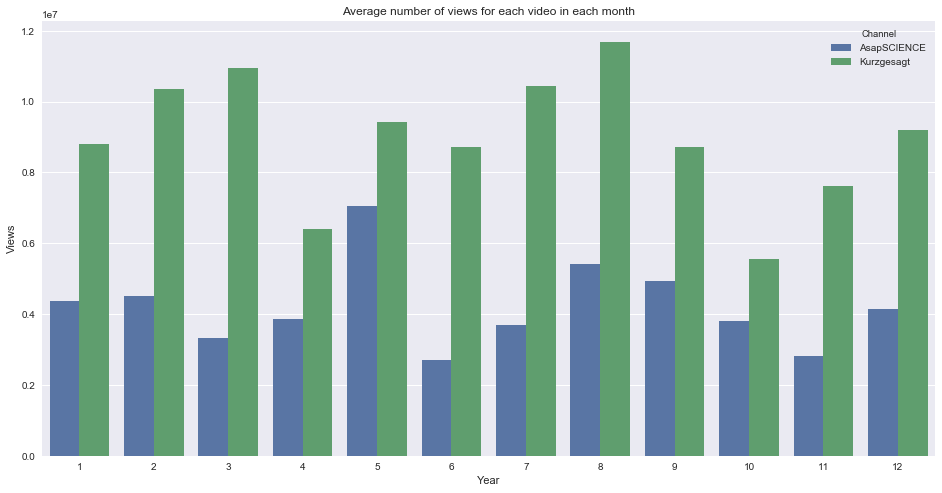

In [49]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "Year", y="Views", hue="Channel", data=df)
plt.title('Average number of views for each video in each month')

## What impact on the amount of views
We tried to find some dependence between positive reactions ratio and amount of views. The chart below shows that there is
not that kind of dependency. Perhaps for algorithm that positioning videos on youtube kind of reaction is not important.
In the next step we want to see if the amount of reactions has an impact to views number.

Text(0,0.5,'Amount of views')

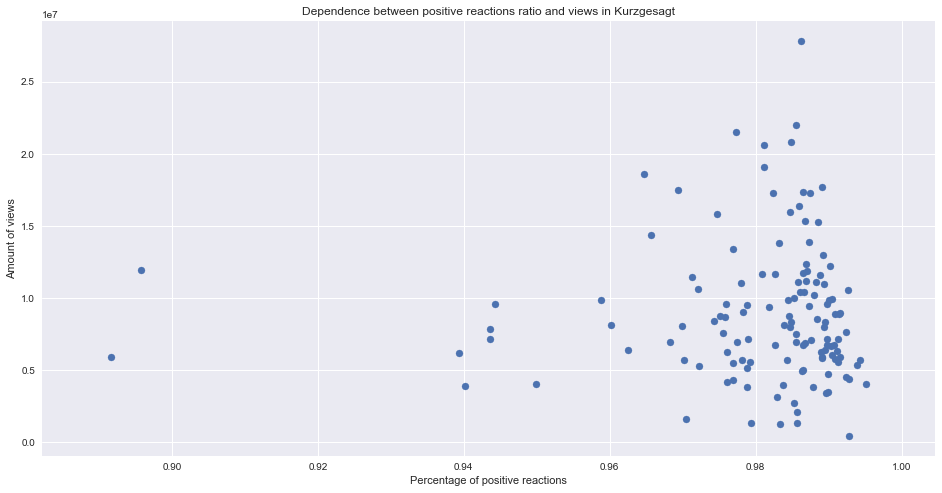

In [50]:
plt.figure(figsize=(16, 8))
plt.scatter(data_kurz['percentage'], data_kurz['views'])
plt.title("Dependence between positive reactions ratio and views in Kurzgesagt")
plt.xlabel("Percentage of positive reactions")
plt.ylabel('Amount of views')

Text(0,0.5,'Amount of views')

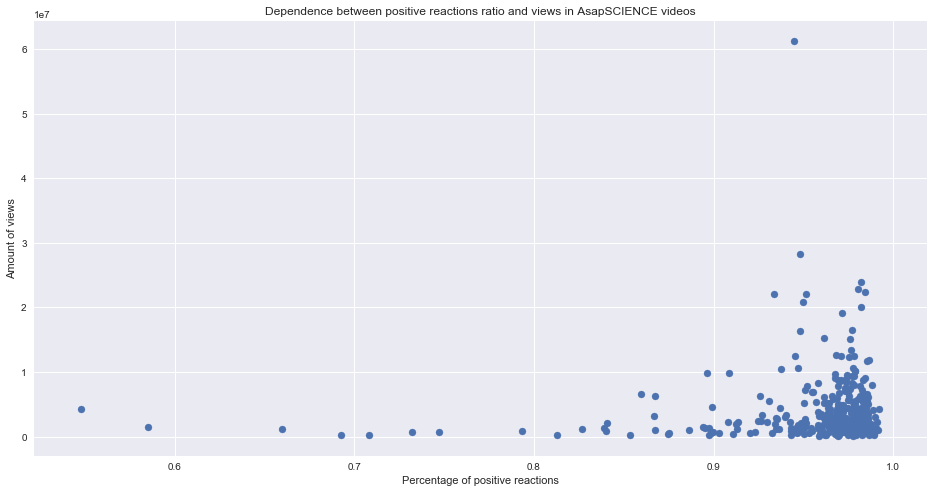

In [51]:
plt.figure(figsize=(16, 8))
plt.scatter(data_asap['percentage'], data_asap['views'])
plt.title("Dependence between positive reactions ratio and views in AsapSCIENCE videos")
plt.xlabel("Percentage of positive reactions")
plt.ylabel('Amount of views')

As we expected there is strong dependency between amount of reactions and views but we cannot say that the reactions impact
to amount of views because it is logical that video with larger number of views usually have more reactions. To confirm 
that number of reactions imply more views we should extract the number of views and reactions in time for each video.
Unfortunately it is not possible by using youtube api.

Text(0,0.5,'Amount of views')

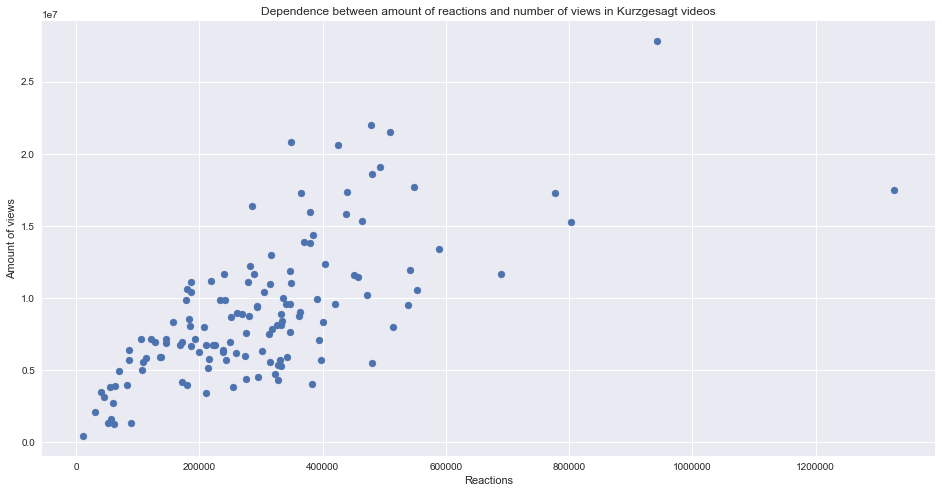

In [52]:
plt.figure(figsize=(16, 8))
plt.scatter(data_kurz['liked'] + data_kurz['disliked'], data_kurz['views'])
plt.title("Dependence between amount of reactions and number of views in Kurzgesagt videos")
plt.xlabel("Reactions")
plt.ylabel('Amount of views')

Text(0,0.5,'Amount of views')

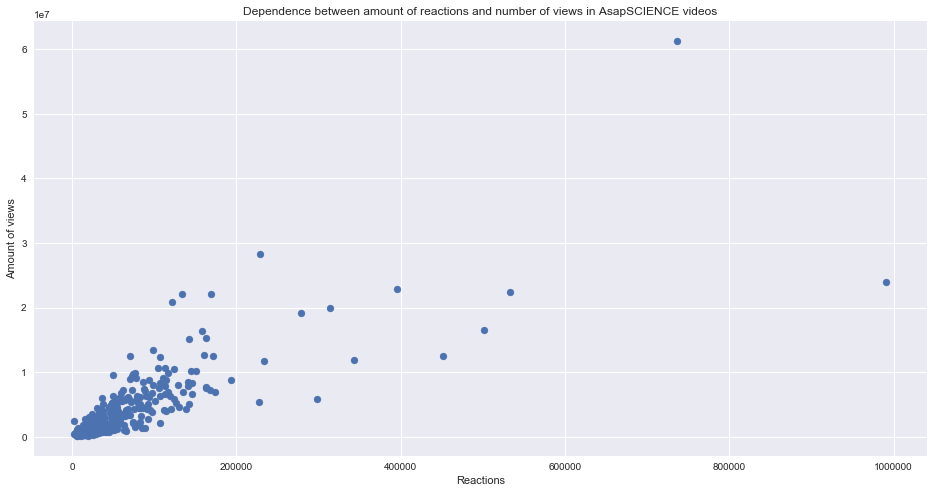

In [54]:
plt.figure(figsize=(16, 8))
plt.scatter(data_asap['liked'] + data_asap['disliked'], data_asap['views'])
plt.title("Dependence between amount of reactions and number of views in AsapSCIENCE videos")
plt.xlabel("Reactions")
plt.ylabel('Amount of views')

## Conclusions

We can see althought content of channels is similar we can see a lot of differences between them. Most visible is fact that views for AsapSCIENCE channel declined over the past two years. Hosts of Kurzgesagt channel have better idea for their materials. Right now they have resources and popularity to develop their content and maintain growth of views over time. We can assume owners of AsapSCIENCE channel made some mistakes and if they decreasing trand will not change for their favor they can foget about recovering popularity which they had in the past.

If there would be possibility we would like to download more data about channels. Esspecialy we want to see how number of views change in time for every single video. RIght now it is not possible by using youtube api. In the future we want to download thumbnails of the video and check how it influences on the number of views. We belive that with that information our analysis would be much better.